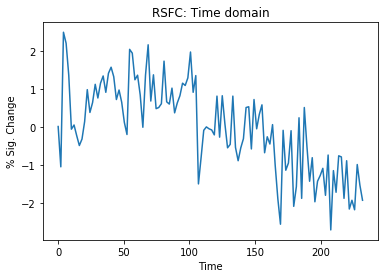

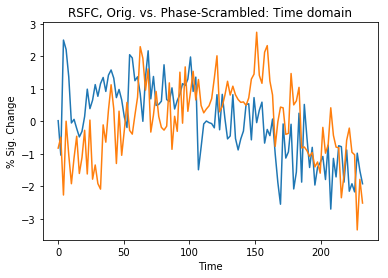

/Users/zhengchy/miniconda3/envs/dyncon/lib/python3.6/site-packages/ipykernel_launcher.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


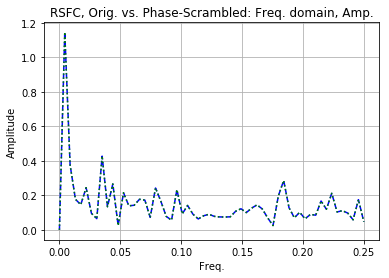

In [198]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from scipy.fftpack import fft, ifft

def phaseScrambleTS(ts):
    """Returns a TS: original TS power is preserved; TS phase is shuffled."""
    fs = fft(ts)
    pow_fs = np.abs(fs) ** 2.
    phase_fs = np.angle(fs)
    phase_fsr = phase_fs.copy()
    if len(ts) % 2 == 0:
        phase_fsr_lh = phase_fsr[1:np.int(len(phase_fsr)/2)]
    else:
        phase_fsr_lh = phase_fsr[1:np.int(len(phase_fsr)/2 + 1)]
    np.random.shuffle(phase_fsr_lh)
    if len(ts) % 2 == 0:
        phase_fsr_rh = -phase_fsr_lh[::-1]
        phase_fsr = np.concatenate((np.array((phase_fsr[0],)), phase_fsr_lh,
                                    np.array((phase_fsr[np.int(len(phase_fsr)/2)],)),
                                    phase_fsr_rh))
    else:
        phase_fsr_rh = -phase_fsr_lh[::-1]
        phase_fsr = np.concatenate((np.array((phase_fsr[0],)), phase_fsr_lh, phase_fsr_rh))
    fsrp = np.sqrt(pow_fs) * (np.cos(phase_fsr) + 1j * np.sin(phase_fsr))
    tsrp = ifft(fsrp)
    if not np.allclose(tsrp.imag, np.zeros(tsrp.shape)):
        max_imag = (np.abs(tsrp.imag)).max()
        imag_str = '\nNOTE: a non-negligible imaginary component was discarded.\n\tMax: {}'
        print(imag_str.format(max_imag))
    return tsrp.real

ts = np.array([0.02, -1.04, 2.50, 2.21, 1.37, -0.05, 0.06, -0.22, -0.48, -0.31, 0.15, 0.99, 0.39, 0.65, 1.13, 0.77, 1.16, 1.35, 0.92, 1.42, 1.58, 1.33, 0.73, 0.98, 0.66, 0.13, -0.19, 2.05, 1.95, 1.25, 1.37, 0.85, 0.00, 1.37, 2.17, 0.69, 1.38, 0.49, 0.52, 0.62, 1.74, 0.67, 0.61, 1.03, 0.38, 0.64, 0.83, 1.16, 1.10, 1.30, 1.98, 0.92, 1.36, -1.49, -0.80, -0.08, 0.01, -0.04, -0.07, -0.20, 0.82, -0.26, 0.83, 0.09, -0.54, -0.45, 0.82, -0.53, -0.88, -0.54, -0.30, 0.52, 0.54, -0.57, 0.73, -0.04, 0.34, 0.59, -0.67, -0.25, -0.44, 0.07, -1.00, -1.88, -2.55, -0.08, -1.13, -0.94, -0.09, -2.08, -1.56, 0.25, -1.87, 0.52, -0.51, -1.42, -0.80, -1.96, -1.42, -1.27, -1.08, -1.79, -0.73, -2.70, -1.14, -1.71, -0.75, -0.78, -1.87, -0.88, -2.15, -1.92, -2.17, -0.98, -1.52, -1.92], dtype=np.float)

N = ts.shape[0]
TR = 2.
x = np.linspace(0.0, N*TR, N)
plt.plot(x, ts)
plt.ylabel('% Sig. Change')
plt.xlabel('Time')
plt.title('RSFC: Time domain')
plt.show()

ts_ps = phaseScrambleTS(ts)
plt.plot(x, ts, x, ts_ps)
plt.ylabel('% Sig. Change')
plt.xlabel('Time')
plt.title('RSFC, Orig. vs. Phase-Scrambled: Time domain')
plt.show()

fs = fft(ts)
fs_ps = fft(ts_ps)
xf = np.linspace(0.0, 1.0/(2.0*TR), N/2)
plt.plot(xf, 2./N * np.abs(fs[0:int(N/2)]), 'b--', xf, 2./N * np.abs(fs_ps[0:int(N/2)]), 'g:')
plt.grid()
plt.ylabel('Amplitude')
plt.xlabel('Freq.')
plt.title('RSFC, Orig. vs. Phase-Scrambled: Freq. domain, Amp.')
plt.show()

In [199]:
int(N/2)

58

In [262]:
ts = np.load('../10subjects/subj_010001_ses-02_task-rest_acq-AP_run-01_M_BASC_scale064.npz')['ts']

In [263]:
ts.shape

(652, 93)

In [264]:
fs0 = fft(ts[:,0])

In [265]:
N

116

/Users/zhengchy/miniconda3/envs/dyncon/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


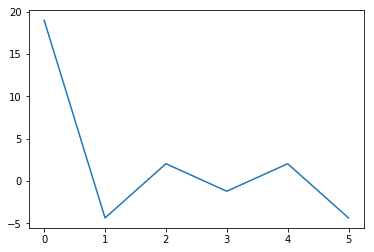

In [266]:
plt.plot(fft(np.array([2.2, 3.4, 4.5, 5.5, 2.2, 1.2])))

In [267]:
ts.shape

(652, 93)

In [268]:
ts = ts[:-1,:]

In [281]:
ts.shape

(651, 93)

In [282]:
nT_h

324

In [283]:
ts.shape[0]

651

In [284]:
nT_h = int(ts.shape[0]/2 - 1)
nT_h

324

In [285]:
a = np.arange(7)
a

array([0, 1, 2, 3, 4, 5, 6])

In [286]:
a[-3:]

array([4, 5, 6])

In [295]:
def phase_randomize(ts):
    if ts.shape[0] % 2 == 0:
        nT_h = int(ts.shape[0]/2 - 1)
    else:
        nT_h = int(ts.shape[0]/2 - 1)
    fs = fft(ts, axis = 0)
    nT = ts.shape[0]
    thetas_lh = np.random.rand(nT_h)

    ph_interv1 = np.exp(2 * np.pi * 1j * thetas_lh).reshape((-1, 1))
    ph_interv2 = np.conj(ph_interv1[::-1]).reshape((-1, 1))

    fs_rot = fs.copy()
    fs_rot[1:(nT_h+1)] = fs[1:(nT_h+1)] * ph_interv1
    fs_rot[-nT_h:] = fs[-nT_h:] * ph_interv2
    ts2 = np.real(ifft(fs_rot, axis = 0))
    return ts2

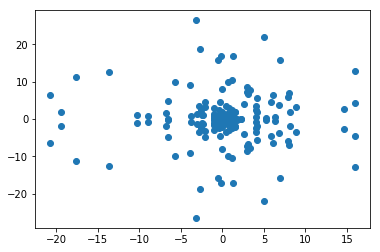

In [296]:
fs2 = fft(ts2, axis=0)
plt.scatter(np.real(fs2[:,0]), np.imag(fs2[:,0]))

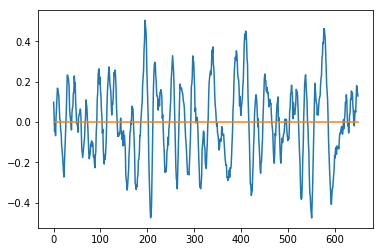

In [289]:
plt.plot(np.real(ifft(fs_rot, axis = 0)[:,0]))
plt.plot(np.imag(ifft(fs_rot, axis = 0)[:,0]))


In [290]:
#plt.scatter(np.real(rotation_const), np.imag(rotation_const))

In [291]:
np.corrcoef(ts.T)

array([[ 1.        ,  0.80565232,  0.11874901, ..., -0.24793741,
        -0.06945031, -0.28645436],
       [ 0.80565232,  1.        ,  0.33543645, ..., -0.06430246,
         0.03399001, -0.06132807],
       [ 0.11874901,  0.33543645,  1.        , ...,  0.03576871,
         0.33388227,  0.07708549],
       ..., 
       [-0.24793741, -0.06430246,  0.03576871, ...,  1.        ,
         0.38980693,  0.524042  ],
       [-0.06945031,  0.03399001,  0.33388227, ...,  0.38980693,
         1.        ,  0.55146161],
       [-0.28645436, -0.06132807,  0.07708549, ...,  0.524042  ,
         0.55146161,  1.        ]])

In [297]:
np.corrcoef(phase_randomize(ts).T)

array([[ 1.        ,  0.80565232,  0.11874901, ..., -0.24793741,
        -0.06945031, -0.28645436],
       [ 0.80565232,  1.        ,  0.33543645, ..., -0.06430246,
         0.03399001, -0.06132807],
       [ 0.11874901,  0.33543645,  1.        , ...,  0.03576871,
         0.33388227,  0.07708549],
       ..., 
       [-0.24793741, -0.06430246,  0.03576871, ...,  1.        ,
         0.38980693,  0.524042  ],
       [-0.06945031,  0.03399001,  0.33388227, ...,  0.38980693,
         1.        ,  0.55146161],
       [-0.28645436, -0.06132807,  0.07708549, ...,  0.524042  ,
         0.55146161,  1.        ]])

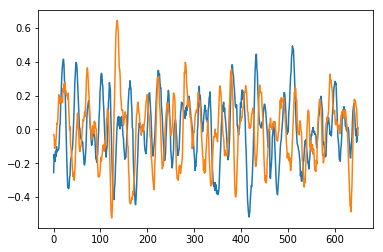

In [299]:
plt.plot(ts[:,0])
plt.plot(phase_randomize(ts)[:,0])

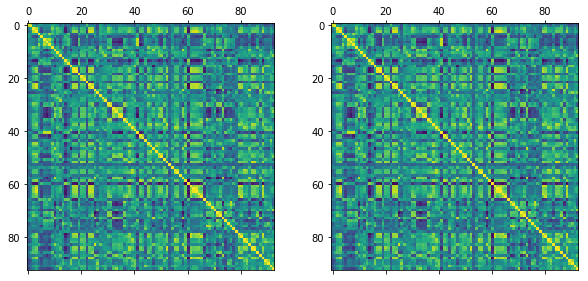

In [293]:
plt.figure(figsize = (10,10))
ax = plt.subplot(2,2,1)
ax.matshow(np.corrcoef(ts.T))
ax = plt.subplot(2,2,2)
ax.matshow(np.corrcoef(ts.T))
